In [1]:
# Description of this notebook

# In this notebook we are preprocessing the unprocessed data

# 1. Import Necessary Modules

In [2]:
#importing necessary modules required for this notebook

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import sklearn as sk

# 2. Load The Dataset

In [3]:
# loading the dataset "Unprocessed_Dataset"

data=pd.read_csv("Unprocessed_Dataset.csv")

# 3. Dataset Features

In [5]:
# shape of the dataset "Unprocessed_Dataset"

data.shape

(10000, 10)

In [6]:
# displaying first five records of the dataset "Unprocessed_Dataset"

data.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_http,TinyURL,Prefix_Suffix,Ouput
0,graphicriver.net,0,0,1,1,0,0,0,0,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,0
2,hubpages.com,0,0,1,1,0,0,0,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,0
4,icicibank.com,0,0,1,3,0,0,0,0,0


In [7]:
# displaying last five records of the dataset "Unprocessed_Dataset"

data.tail()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_http,TinyURL,Prefix_Suffix,Ouput
9995,wvk12-my.sharepoint.com,0,0,1,5,0,0,1,1,1
9996,adplife.com,0,0,1,4,0,0,0,0,1
9997,kurortnoye.com.ua,0,1,1,3,0,0,1,0,1
9998,norcaltc-my.sharepoint.com,0,0,1,5,0,0,1,1,1
9999,sieck-kuehlsysteme.de,0,1,1,4,0,0,1,1,1


# 4. Data Preprocessing

In [8]:
# Dropping unnecessary columns

# The column "Domain" serves no purpose for predicting the target column so drop that column

data=data.drop(['Domain'], axis=1)

data.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_http,TinyURL,Prefix_Suffix,Ouput
0,0,0,1,1,0,0,0,0,0
1,0,0,1,1,1,0,0,0,0
2,0,0,1,1,0,0,0,0,0
3,0,0,1,3,0,0,0,0,0
4,0,0,1,3,0,0,0,0,0


In [9]:
# Selecting Target Column

print("Here \"Output\" column is the target column")

Here "Output" column is the target column


In [10]:
# Selecting independent columns

print("Except \"Output\" column all other columns are independent columns")

Except "Output" column all other columns are independent columns


In [11]:
# Displaying the info of dataset "Unprocessed_Dataset"

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Have_IP        10000 non-null  int64
 1   Have_At        10000 non-null  int64
 2   URL_Length     10000 non-null  int64
 3   URL_Depth      10000 non-null  int64
 4   Redirection    10000 non-null  int64
 5   https_http     10000 non-null  int64
 6   TinyURL        10000 non-null  int64
 7   Prefix_Suffix  10000 non-null  int64
 8   Ouput          10000 non-null  int64
dtypes: int64(9)
memory usage: 703.2 KB


# 4.1 Encoding

In [12]:
# As there is no categorical column in this dataset so there is no need for encoding

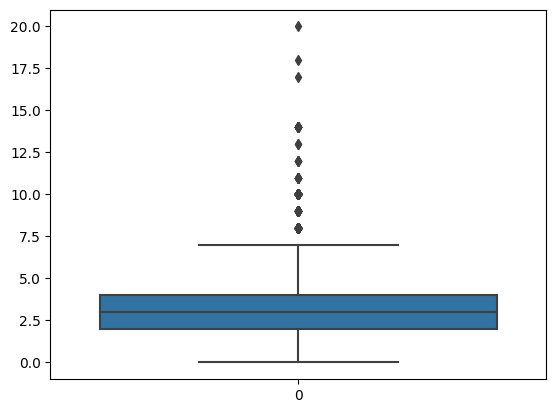

In [13]:
# As Column "URL_Depth" has numerical values so outliers may occur and other columns are categorical columns so no outliers

# Outlier Detection for column "URL_Depth" in dataset "Unprocessed_Dataset"
# And replace it with its median value

#Detection 
sns.boxplot(data.URL_Depth)
plt.show()
# This column has outliers

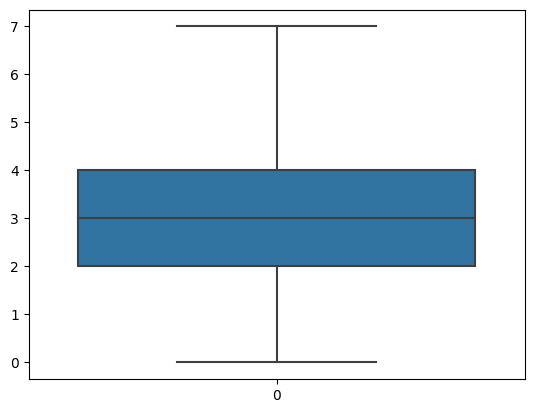

In [14]:
#Replacement
q1=data.URL_Depth.quantile(0.25)
q3=data.URL_Depth.quantile(0.75)
IQR=q3-q1
upper_limit=q3+1.5*IQR
data['URL_Depth']=np.where(data['URL_Depth']>upper_limit,data['URL_Depth'].median(),data['URL_Depth'])

#Boxplot after Outlier Replacement
sns.boxplot(data.URL_Depth)
plt.show()

In [15]:
data.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_http,TinyURL,Prefix_Suffix,Ouput
0,0,0,1,1.0,0,0,0,0,0
1,0,0,1,1.0,1,0,0,0,0
2,0,0,1,1.0,0,0,0,0,0
3,0,0,1,3.0,0,0,0,0,0
4,0,0,1,3.0,0,0,0,0,0


# 4.3 Descriptive Statistics

In [18]:
# Display the descriptive statistics of the dataset

data.describe()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_http,TinyURL,Prefix_Suffix,Ouput
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.005500,0.022600,0.773400,2.841100,0.013500,0.000200,0.090300,0.093200,0.500000
std,0.073961,0.148632,0.418653,1.708433,0.115408,0.014141,0.286625,0.290727,0.500025
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.500000
75%,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 4.4 Elimination of null values

In [19]:
# checking whether null value is present or not in each column

data.isnull().any()

# There is no null values in any column

Have_IP          False
Have_At          False
URL_Length       False
URL_Depth        False
Redirection      False
https_http       False
TinyURL          False
Prefix_Suffix    False
Ouput            False
dtype: bool

# 4.5 Unique and Value counts

In [20]:
# unique values and value counts of "Have_IP" column

data.Have_IP.value_counts()

0    9945
1      55
Name: Have_IP, dtype: int64

In [21]:
# unique values and value counts of "Have_At" column

data.Have_At.value_counts()

0    9774
1     226
Name: Have_At, dtype: int64

In [22]:
# unique values and value counts of "URL_Length" column

data.URL_Length.value_counts()

1    7734
0    2266
Name: URL_Length, dtype: int64

In [23]:
# unique values and value counts of "URL_Depth" column

data.URL_Depth.value_counts()

2.0    2298
3.0    2266
1.0    1608
4.0    1384
5.0     963
0.0     689
6.0     486
7.0     306
Name: URL_Depth, dtype: int64

In [24]:
# unique values and value counts of "Redirection" column

data.Redirection.value_counts()

0    9865
1     135
Name: Redirection, dtype: int64

In [25]:
# unique values and value counts of "https_http" column

data.https_http.value_counts()

0    9998
1       2
Name: https_http, dtype: int64

In [26]:
# unique values and value counts of "TinyURL" column

data.TinyURL.value_counts()

0    9097
1     903
Name: TinyURL, dtype: int64

In [27]:
# unique values and value counts of "Prefix_Suffix" column

data.Prefix_Suffix.value_counts()

0    9068
1     932
Name: Prefix_Suffix, dtype: int64

In [28]:
# unique values and value counts of "Ouput" column

data.Ouput.value_counts()

0    5000
1    5000
Name: Ouput, dtype: int64

# 5. Data Visualizing

## 5.1 ScatterPlot of Each column with Target Column

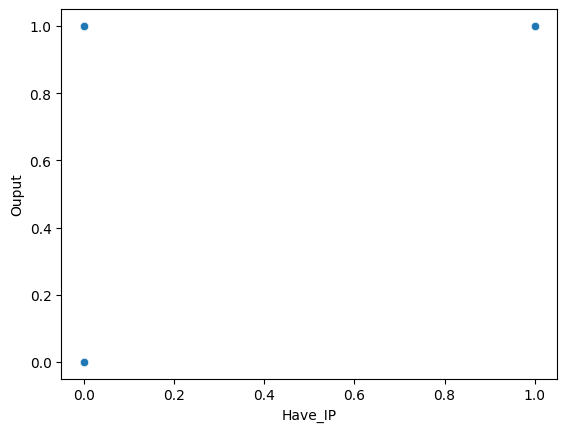

In [33]:
# "Have_IP" COlumn 

sns.scatterplot(data, x="Have_IP", y="Ouput")
plt.show()

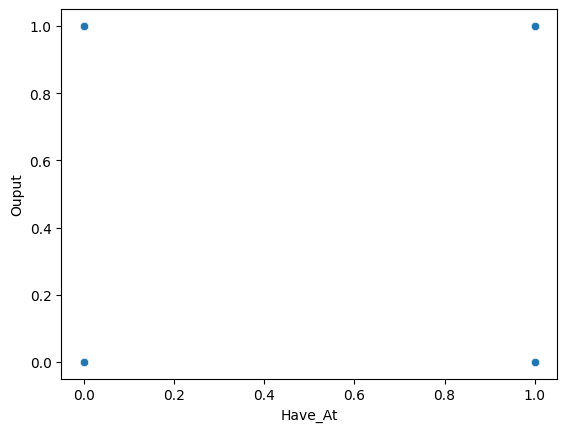

In [34]:
# "Have_At" COlumn 

sns.scatterplot(data, x="Have_At", y="Ouput")
plt.show()

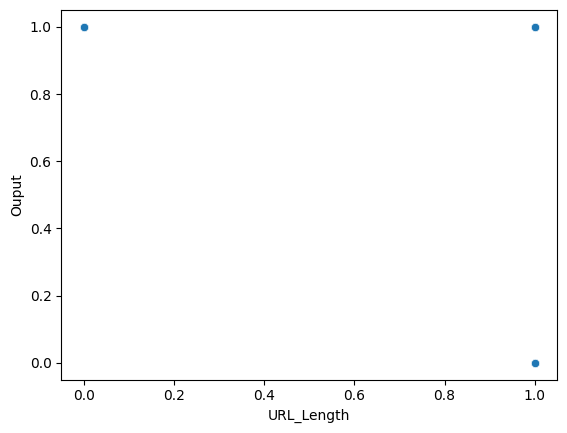

In [35]:
# "URL_Length" COlumn 

sns.scatterplot(data, x="URL_Length", y="Ouput")
plt.show()

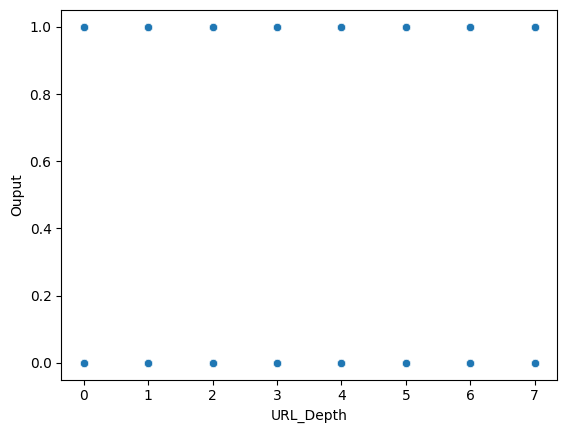

In [36]:
# "URL_Depth" COlumn 

sns.scatterplot(data, x="URL_Depth", y="Ouput")
plt.show()

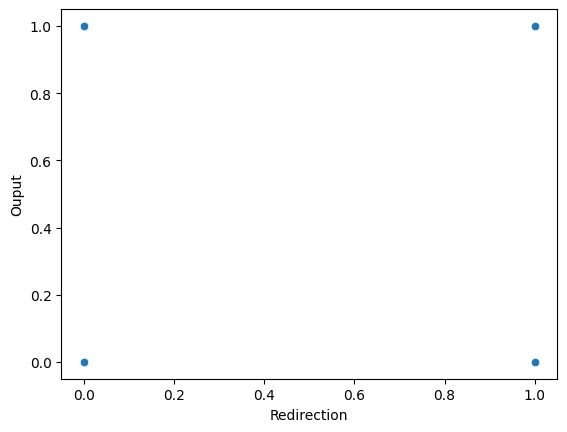

In [37]:
# "Redirection" COlumn 

sns.scatterplot(data, x="Redirection", y="Ouput")
plt.show()

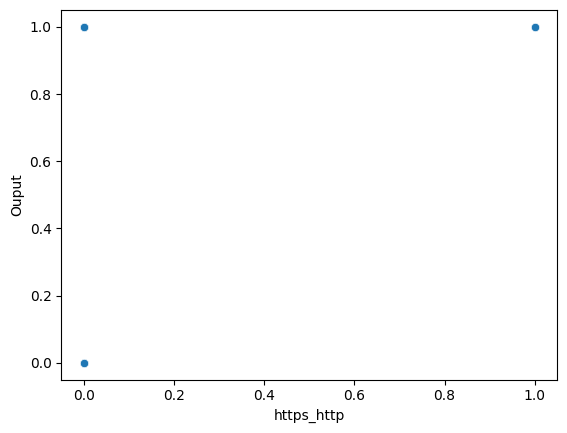

In [40]:
# "https_http" COlumn 

sns.scatterplot(data, x="https_http", y="Ouput")
plt.show()

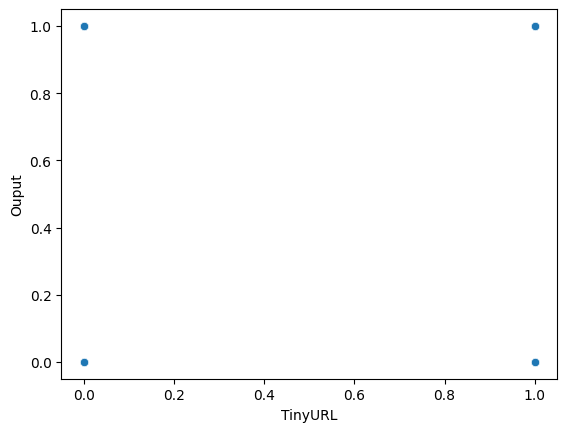

In [41]:
# "TinyURL" COlumn 

sns.scatterplot(data, x="TinyURL", y="Ouput")
plt.show()

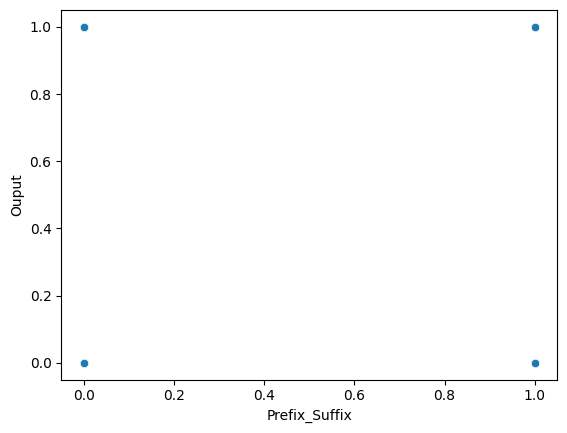

In [42]:
# "Prefix_Suffix" COlumn 

sns.scatterplot(data, x="Prefix_Suffix", y="Ouput")
plt.show()

# 5.2 Distribution plot of each column

C:\Users\smile\AppData\Local\Temp\ipykernel_5080\3316438855.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Have_IP)


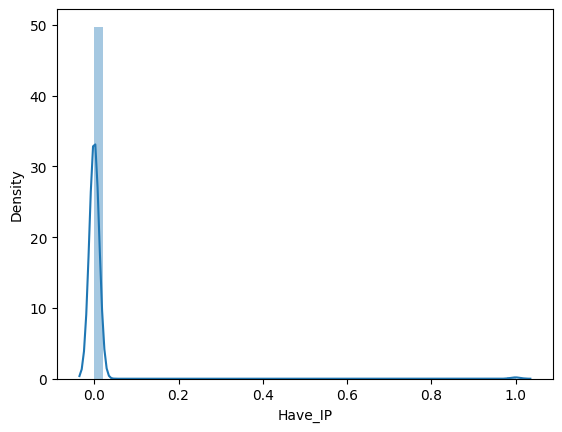

In [44]:
# "Have_IP" Column

sns.distplot(data.Have_IP)
plt.show()

C:\Users\smile\AppData\Local\Temp\ipykernel_5080\2372616599.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Have_At)


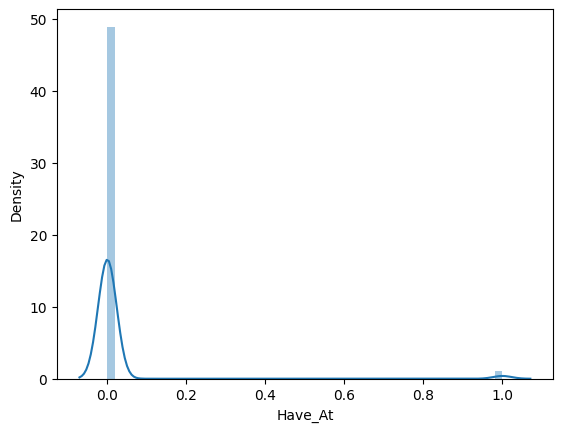

In [45]:
# "Have_At" Column

sns.distplot(data.Have_At)
plt.show()

C:\Users\smile\AppData\Local\Temp\ipykernel_5080\2505620189.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.URL_Length)


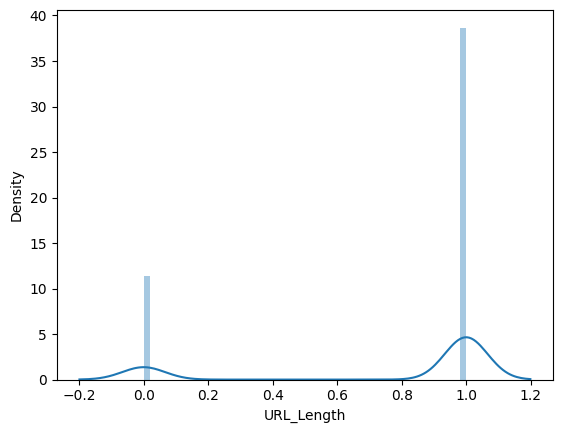

In [46]:
# "URL_Length" Column

sns.distplot(data.URL_Length)
plt.show()

C:\Users\smile\AppData\Local\Temp\ipykernel_5080\932854088.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.URL_Depth)


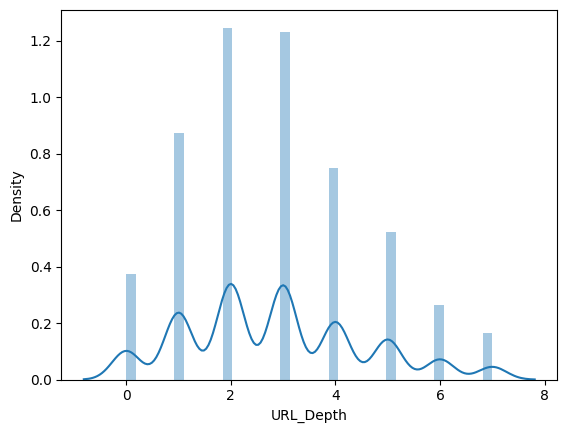

In [47]:
# "URL_Depth" Column

sns.distplot(data.URL_Depth)
plt.show()

C:\Users\smile\AppData\Local\Temp\ipykernel_5080\3334729956.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Redirection)


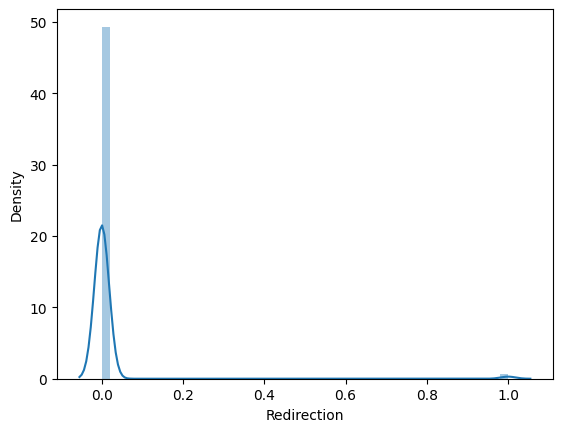

In [48]:
# "Redirection" Column

sns.distplot(data.Redirection)
plt.show()

C:\Users\smile\AppData\Local\Temp\ipykernel_5080\2372590109.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.https_http)


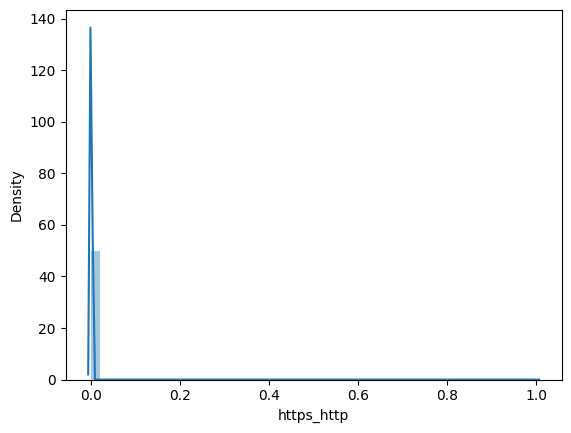

In [49]:
# "https_http" Column

sns.distplot(data.https_http)
plt.show()

C:\Users\smile\AppData\Local\Temp\ipykernel_5080\1202499161.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.TinyURL)


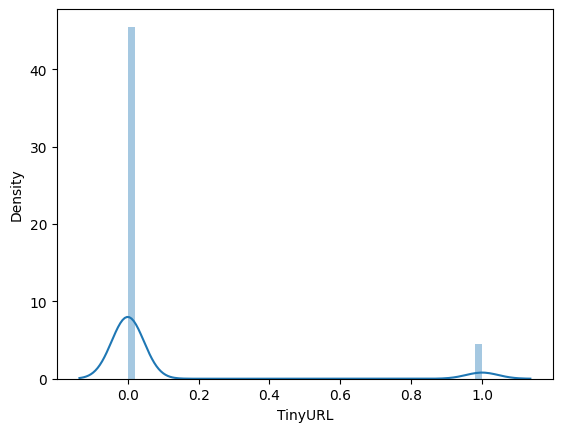

In [50]:
# "TinyURL" Column

sns.distplot(data.TinyURL)
plt.show()

C:\Users\smile\AppData\Local\Temp\ipykernel_5080\1816083430.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Prefix_Suffix)


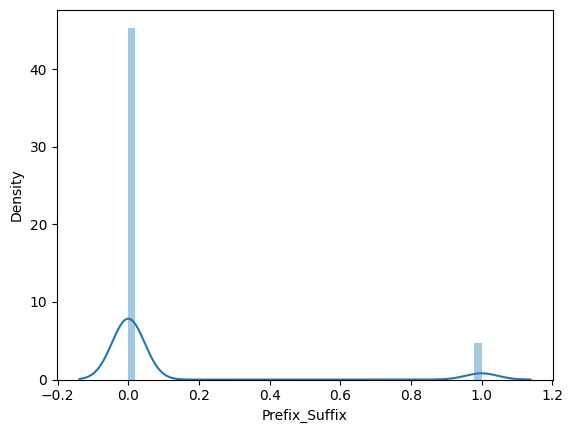

In [51]:
# "Prefix_Suffix" Column

sns.distplot(data.Prefix_Suffix)
plt.show()

C:\Users\smile\AppData\Local\Temp\ipykernel_5080\1741146958.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Ouput)


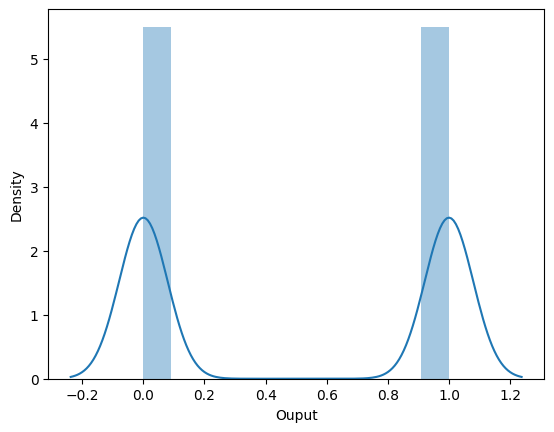

In [52]:
# "Ouput" Column

sns.distplot(data.Ouput)
plt.show()

# 5.3 Correlation and HeatMap

In [53]:
# Checking the correlation between columns

data.corr()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_http,TinyURL,Prefix_Suffix,Ouput
Have_IP,1.000000,-0.011308,-0.076021,-0.031865,-0.008700,-0.001052,-0.023430,-0.023841,0.074367
Have_At,-0.011308,1.000000,0.067844,0.039744,-0.000297,-0.002151,0.067122,0.018369,0.118419
URL_Length,-0.076021,0.067844,1.000000,0.474285,0.038482,0.007656,-0.005318,-0.146102,-0.541287
URL_Depth,-0.031865,0.039744,0.474285,1.000000,-0.063175,0.001316,0.039721,-0.104886,-0.129540
Redirection,-0.008700,-0.000297,0.038482,-0.063175,1.000000,-0.001655,0.026634,-0.025581,0.002600
https_http,-0.001052,-0.002151,0.007656,0.001316,-0.001655,1.000000,-0.004456,-0.004534,0.014144
TinyURL,-0.023430,0.067122,-0.005318,0.039721,0.026634,-0.004456,1.000000,0.087421,0.072921
Prefix_Suffix,-0.023841,0.018369,-0.146102,-0.104886,-0.025581,-0.004534,0.087421,1.000000,0.302705
Ouput,0.074367,0.118419,-0.541287,-0.129540,0.002600,0.014144,0.072921,0.302705,1.000000


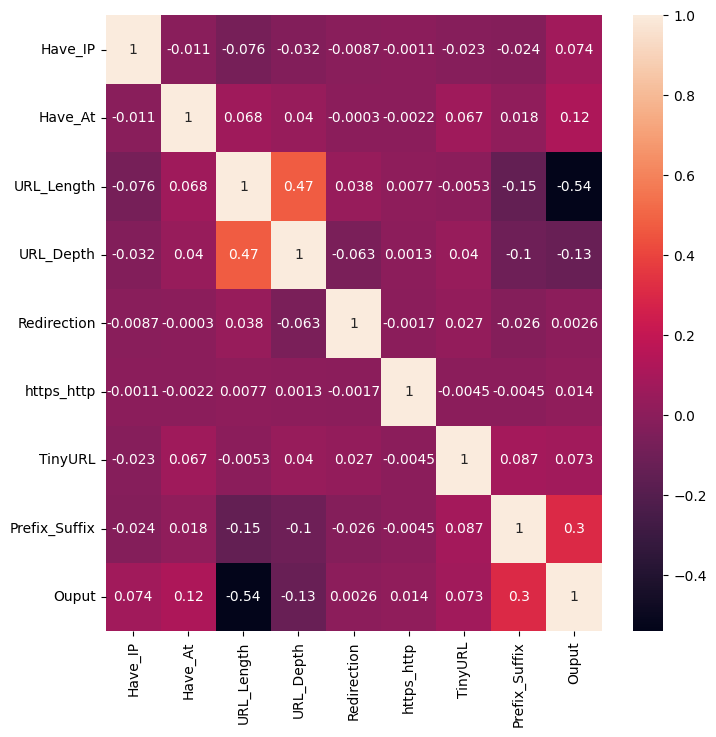

In [54]:
# Visual representation of correlation between columns(HeatMap)

plt.figure(figsize=(8,8))
sns.heatmap(data.corr(),annot=True)
plt.show()

# There is no much correlation among target column and independent column

In [55]:
# finding the most correlated independent column with target column

data.corr().Ouput.sort_values(ascending=False)

#here column "Prefix_Suffix" is somewhat correlated with the target column

Ouput            1.000000
Prefix_Suffix    0.302705
Have_At          0.118419
Have_IP          0.074367
TinyURL          0.072921
https_http       0.014144
Redirection      0.002600
URL_Depth       -0.129540
URL_Length      -0.541287
Name: Ouput, dtype: float64

In [56]:
# multicollinearity

# There is no multicollinearity between any two independent columns


In [57]:
#writing the preprocessed data into a csv file

data.to_csv('Preprocessed_Dataset.csv')